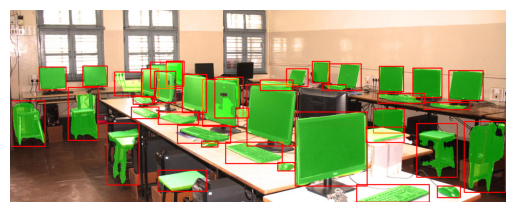

In [5]:
import torch
import torchvision
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load pretrained Mask R-CNN
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess image
image_path = "lab.jpg"  # Replace with your 2D image
image = Image.open(image_path).convert("RGB")
image_tensor = F.to_tensor(image).unsqueeze(0)

# Perform detection
with torch.no_grad():
    output = model(image_tensor)[0]

# Visualize
def show_segmentation(image, output, threshold=0.5):
    image = np.array(image)
    masks = output['masks']
    boxes = output['boxes']
    labels = output['labels']
    scores = output['scores']

    for i in range(len(masks)):
        if scores[i] > threshold:
            mask = masks[i, 0].mul(255).byte().cpu().numpy()
            color_mask = np.zeros_like(image)
            color_mask[mask > 128] = [0, 255, 0]
            image = cv2.addWeighted(image, 1, color_mask, 0.5, 0)
            box = boxes[i].detach().numpy().astype(int)
            cv2.rectangle(image, tuple(box[:2]), tuple(box[2:]), (255, 0, 0), 2)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

show_segmentation(image, output)


In [4]:
import open3d as o3d
import numpy as np

# Load sample point cloud
pcd = o3d.io.read_point_cloud("sample.pcd")  # Replace with your point cloud file
o3d.visualization.draw_geometries([pcd])

# Simulated segmentation mask (e.g., from PointNet)
# Assigning random labels (in practice, this comes from your PointNet model)
points = np.asarray(pcd.points)
num_points = points.shape[0]
labels = np.random.randint(0, 3, size=num_points)  # Simulating 3 object classes

# Assign colors based on labels
colors = np.zeros((num_points, 3))
colors[labels == 0] = [1, 0, 0]
colors[labels == 1] = [0, 1, 0]
colors[labels == 2] = [0, 0, 1]
pcd.colors = o3d.utility.Vector3dVector(colors)

# Visualize segmented point cloud
o3d.visualization.draw_geometries([pcd])
